# 75.06/95.58 Organización de Datos
# Primer Cuatrimestre de 2020
# Trabajo Práctico 1: Enunciado

El trabajo práctico 1 de la materia se basa en el análisis de los tweets del set de datos de la competencia: https://www.kaggle.com/c/nlp-getting-started.  

- id - identificador unico para cada  tweet
- text - el texto del tweet
- location - ubicación desde donde fue enviado (podría no estar)
- keyword - un keyword para el tweet  (podría faltar)
- target - en train.csv, indica si se trata de un desastre real  (1) o no (0)

El objetivo del primer TP es realizar un análisis exploratorio del set de datos. Queremos ver qué cosas podemos descubrir sobre los datos que puedan resultar interesantes. Estas cosas pueden estar relacionadas al objetivo del TP2 (predecir si un cierto tweet es real o no) o no, ambas son de interés.

## Los requisitos de la primera entrega son los siguientes:

- El análisis debe estar hecho en Python Pandas o R.
- El análisis debe entregarse en formato pdf vía gradescope. En el informe no va código.
- Informar el link a un repositorio Github en donde pueda bajarse el código completo para generar el análisis.

## La evaluación del TP se realizará en base al siguiente criterio:

- Originalidad del análisis exploratorio. 
- Calidad del reporte. ¿Está bien escrito? ¿Es claro y preciso? 
- Calidad del análisis exploratorio: qué tipo de preguntas se hacen y de qué forma se responden, ¿es la respuesta clara y concisa con respecto a la pregunta formulada? 
- Calidad de las visualizaciones presentadas.
- ¿Tienen todos los ejes su rótulo?
- ¿Tiene cada visualización un título?
- ¿Es entendible la visualización sin tener que leer la explicación?
- ¿El tipo de plot elegido es adecuado para lo que se quiere visualizar?
- ¿Es una visualización interesante?
- ¿El uso del color es adecuado?
- ¿Hay un exceso o falta de elementos visuales en la visualización elegida?
- ¿La visualización es consistente con los datos?
- Conclusiones presentadas.
- ¿Presenta el grupo un listado de "insights" aprendidos sobre los datos en base al análisis realizado? ¿Es interesante? 


El grupo que realice el mejor análisis exploratorio obtendrá 10 puntos para cada uno de sus integrantes que podrán ser usados en el parcial además de ser publicado en el repositorio de la materia como ejemplo para los siguientes cuatrimestres. 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



plt.style.use('default')

sns.set(style="whitegrid")

pd.options.display.float_format = '{:20,.2f}'.format 

import warnings
warnings.filterwarnings('ignore')

## Empiezo a analizar la informacion

### Analisis de realacion tweets verdaderos/falsos por longitud de texto

In [2]:
tweets_original = pd.read_csv('train.csv',index_col=['id'])
tweets_original.head()

,keyword,location,text,target
id,,,,
1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
tweets = tweets_original.drop(columns=['keyword', 'location'])
tweets['len_tw'] = tweets['text'].str.len()
tweets.head()

,text,target,len_tw
id,,,
1,Our Deeds are the Reason of this #earthquake M...,1,69
4,Forest fire near La Ronge Sask. Canada,1,38
5,All residents asked to 'shelter in place' are ...,1,133
6,"13,000 people receive #wildfires evacuation or...",1,65
7,Just got sent this photo from Ruby #Alaska as ...,1,88


Para una mejor visualizacion del target, en vez de tener numeros asociados a la veracidad de los mismos, pondremos strings de tal forma que sean mas descriptivos. Entonces al valor 1 le cambiamos por "Real" y al valor 0 lo cambiamos por "No Real". De esta forma esta columna ahora es mucho mas descriptiva que un valor numerico.

In [4]:
tweets['target'] = tweets['target'].replace({0: 'No Real', 1: 'Real'})
tweets.head()


,text,target,len_tw
id,,,
1,Our Deeds are the Reason of this #earthquake M...,Real,69
4,Forest fire near La Ronge Sask. Canada,Real,38
5,All residents asked to 'shelter in place' are ...,Real,133
6,"13,000 people receive #wildfires evacuation or...",Real,65
7,Just got sent this photo from Ruby #Alaska as ...,Real,88


Vemos la cantidad de tweets para cada caso de target.

In [5]:
tweets['target'].value_counts()

No Real    4342
Real       3271
Name: target, dtype: int64

Ahora agrupamos a los tweets por su target para hacerle algunos calculos estadisticos

In [6]:
grouped_by_target = tweets.groupby(['target']).agg({'len_tw': ['mean', 'count']})
grouped_by_target.head()

len_tw      
                        mean count
target                            
No Real                95.83  4342
Real                  108.24  3271

Juntamos ambos levels de indice, para que queden 2 columnas

In [7]:
level0 = grouped_by_target.columns.get_level_values(0)
level1 = grouped_by_target.columns.get_level_values(1)
grouped_by_target.columns = level0 + '_' + level1
grouped_by_target.columns = ['promedio_de_longitud','cantidad_total']
grouped_by_target.head()


,promedio_de_longitud,cantidad_total
target,,
No Real,95.83,4342
Real,108.24,3271


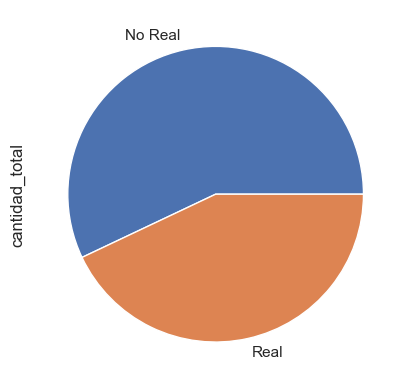

In [8]:
grouped_by_target['cantidad_total'].plot(kind='pie')

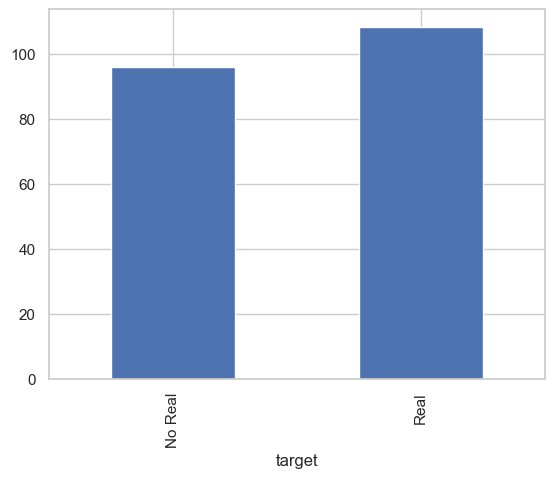

In [9]:
grouped_by_target['promedio_de_longitud'].plot(kind='bar')


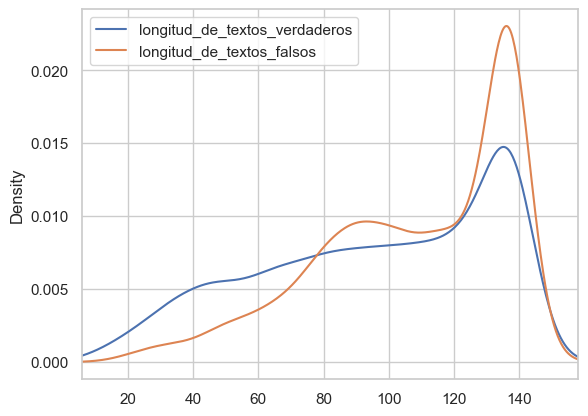

In [10]:
minimo = tweets['len_tw'].min()
maximo = tweets['len_tw'].max()
rango = (minimo - 1, maximo + 1)
tweets.loc[tweets['target'] == 'No Real', 'longitud_de_textos_verdaderos'] = tweets['len_tw']
tweets.loc[tweets['target'] == 'Real', 'longitud_de_textos_falsos'] = tweets['len_tw']
grafico = tweets[['longitud_de_textos_verdaderos','longitud_de_textos_falsos']]
grafico.plot(kind='density', xlim=rango)

Text(0, 0.5, 'Length')

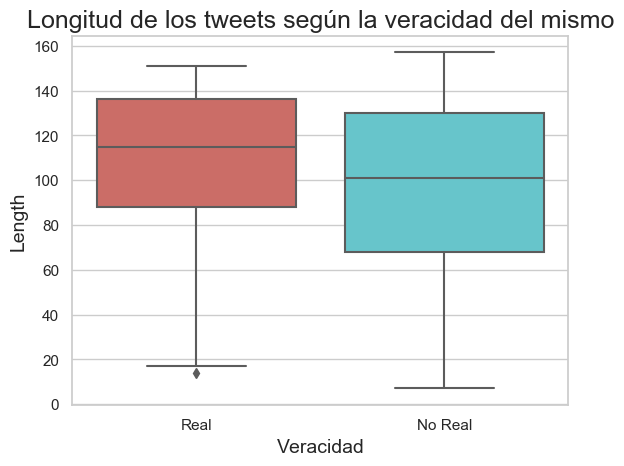

In [11]:
g = sns.boxplot(x="target", y="len_tw", data=tweets, palette="hls")
g.set_title("Longitud de los tweets según la veracidad del mismo", fontsize=18)
g.set_xlabel("Veracidad", fontsize=14)
g.set_ylabel("Length", fontsize=14)

### Analisis de realacion tweets verdaderos/falsos por localizacion


Le quito los nulos

In [85]:
grupo_por_localizacion = tweets_original.groupby(['location']).agg({'target':['count','sum']})
grupo_por_localizacion

target    
                        count sum
location                         
                            1   1
  Glasgow                   1   0
  Melbourne, Australia      1   0
  News                      1   1
  å_                        1   0
...                       ...  ..
å_: ?? ÌÑ ? : ?             1   0
å_å_Los Mina Cityã¢        1   0
å¡å¡Midwest Û¢Û¢          1   0
åÊ(?Û¢`?Û¢å«)??           1   0
åø\_(?)_/åø                 1   1

[3341 rows x 2 columns]

Juntamos ambos levels de indice, para que queden 2 columnas

In [14]:
level0 = grupo_por_localizacion.columns.get_level_values(0)
level1 = grupo_por_localizacion.columns.get_level_values(1)
grupo_por_localizacion.columns = level0 + '_' + level1
grupo_por_localizacion.head()

,target_count,target_sum
location,,
,1,1
Glasgow,1,0
"Melbourne, Australia",1,0
News,1,1
å_,1,0


Dada la cantidad de locaciones distintas los divido en aquellas locaciones con mas de la mitad de tweets verdaderos y aquellas que no.

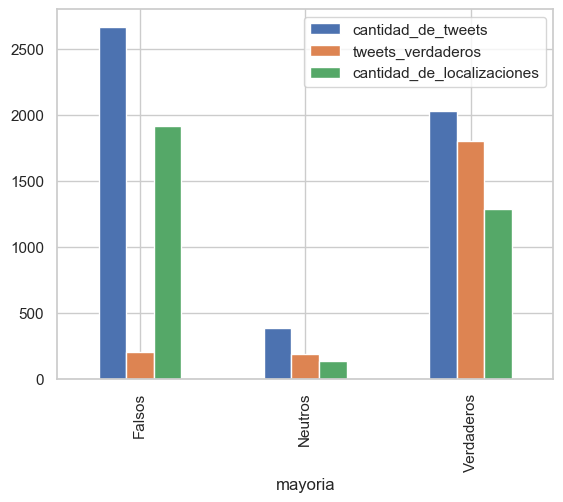

In [15]:
grupo_por_localizacion['cantidad_de_localizaciones'] = 1
grupo_por_localizacion.loc[grupo_por_localizacion['target_sum']/grupo_por_localizacion['target_count'] < 0.5 , 'mayoria'] = 'Falsos'
grupo_por_localizacion.loc[grupo_por_localizacion['target_sum']/grupo_por_localizacion['target_count'] > 0.5 , 'mayoria'] = 'Verdaderos'
grupo_por_localizacion.loc[grupo_por_localizacion['target_sum']/grupo_por_localizacion['target_count'] == 0.5 , 'mayoria'] = 'Neutros'
agrupacion_por_mayoria_en_localizacion = grupo_por_localizacion.groupby(['mayoria']).agg({'target_count':['sum'],'target_sum':['sum'],'cantidad_de_localizaciones':['sum']})
agrupacion_por_mayoria_en_localizacion.columns = ['cantidad_de_tweets','tweets_verdaderos','cantidad_de_localizaciones']
agrupacion_por_mayoria_en_localizacion.plot(kind='bar')

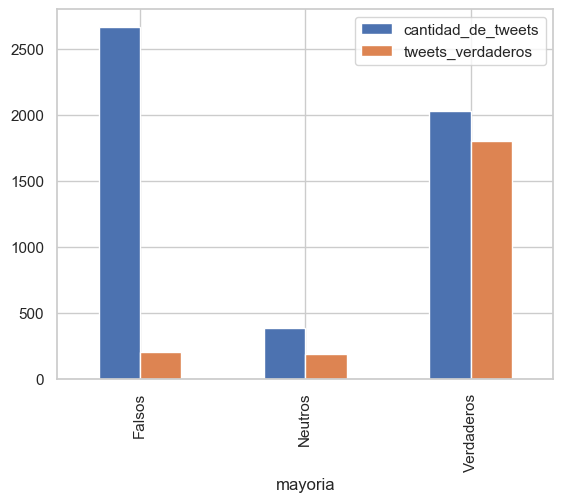

In [16]:
grafico_2 = agrupacion_por_mayoria_en_localizacion[['cantidad_de_tweets','tweets_verdaderos']]
grafico_2.plot(kind='bar')

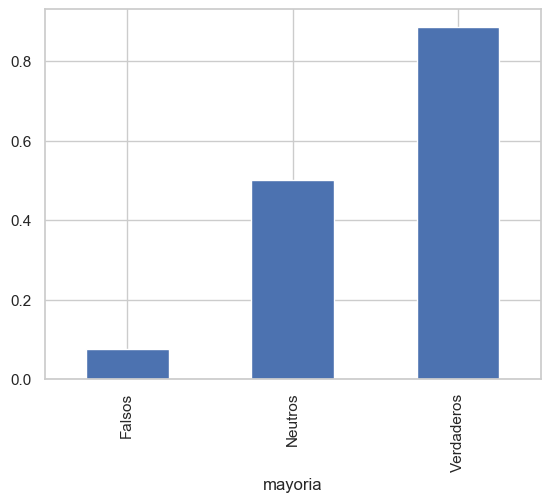

In [17]:
agrupacion_por_mayoria_en_localizacion['proporcion_verdaderos'] = agrupacion_por_mayoria_en_localizacion['tweets_verdaderos']/agrupacion_por_mayoria_en_localizacion['cantidad_de_tweets']
agrupacion_por_mayoria_en_localizacion['proporcion_verdaderos'].plot(kind='bar')

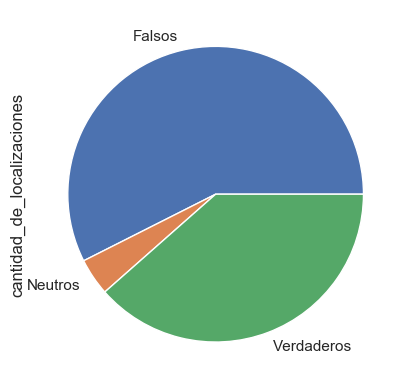

In [18]:
agrupacion_por_mayoria_en_localizacion['cantidad_de_localizaciones'].plot(kind='pie')

### Analisis de realacion tweets localizacion y longitud de textos

analizo la relacionentre la logitud y la localizacion

In [19]:
longitudPorLocacion = tweets_original.drop(columns=['keyword', 'target'])
longitudPorLocacion['text'] = longitudPorLocacion['text'].agg(len)
longitudPorLocacion.head()

,location,text
id,,
1,NaN,69
4,NaN,38
5,NaN,133
6,NaN,65
7,NaN,88


cantidad de localizaciones por longitud de textos

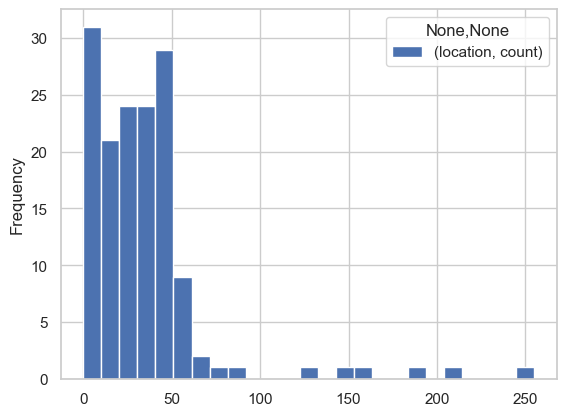

In [20]:
grupo_localizacion_por_longitud = longitudPorLocacion.groupby(['text']).agg({'location':['count']})
grupo_localizacion_por_longitud.plot(kind='hist', bins=25)

In [21]:
grupo_longitud_por_localizacion = longitudPorLocacion.groupby(['location']).agg({'text':['count','mean']})
grupo_longitud_por_localizacion.columns = ['cantidad_de_tweets','longitud_promedio']
grupo_longitud_por_localizacion.head()


,cantidad_de_tweets,longitud_promedio
location,,
,1,56.00
Glasgow,1,70.00
"Melbourne, Australia",1,131.00
News,1,135.00
å_,1,35.00


# Analisis de realacion tweets verdaderos/falsos por keyword

In [83]:
def porcentaje_veracidad(x):
    return (x.sum()/x.count())*100

In [105]:
grupo_por_keyword = tweet_sin_nulos.groupby(['keyword']).agg({'target':['count','sum', porcentaje_veracidad]})
grupo_por_keyword

target                         
                     count sum porcentaje_veracidad
keyword                                            
ablaze                  29  12                41.38
accident                28  21                75.00
aftershock              25   0                 0.00
airplane%20accident     29  24                82.76
ambulance               26  12                46.15
...                    ...  ..                  ...
wounded                 27  21                77.78
wounds                  27   8                29.63
wreck                   27   4                14.81
wreckage                28  28               100.00
wrecked                 22   2                 9.09

[221 rows x 3 columns]

In [106]:
level0 = grupo_por_keyword.columns.get_level_values(0)
level1 = grupo_por_keyword.columns.get_level_values(1)
grupo_por_keyword.columns = level0 + '_' + level1
grupo_por_keyword

,target_count,target_sum,target_porcentaje_veracidad
keyword,,,
ablaze,29,12,41.38
accident,28,21,75.00
aftershock,25,0,0.00
airplane%20accident,29,24,82.76
ambulance,26,12,46.15
...,...,...,...
wounded,27,21,77.78
wounds,27,8,29.63
wreck,27,4,14.81


In [108]:
grupo_por_keyword = grupo_por_keyword.reset_index()
grupo_por_keyword['len_keyword'] 
grupo_por_keyword

,keyword,target_count,target_sum,target_porcentaje_veracidad
0,ablaze,29,12,41.38
1,accident,28,21,75.00
2,aftershock,25,0,0.00
3,airplane%20accident,29,24,82.76
4,ambulance,26,12,46.15
...,...,...,...,...
216,wounded,27,21,77.78
217,wounds,27,8,29.63
218,wreck,27,4,14.81
219,wreckage,28,28,100.00


Text(0, 0.5, 'Porcentaje de veracidad (%)')

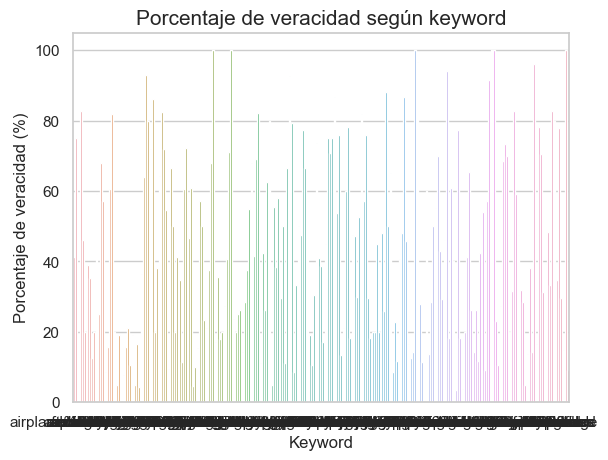

In [111]:
g = sns.barplot(x=grupo_por_keyword['keyword'], y=grupo_por_keyword['target_porcentaje_veracidad'], orient='v')
g.set_title("Porcentaje de veracidad según keyword", fontsize=15)
g.set_xlabel("Keyword", fontsize=12)
g.set_ylabel("Porcentaje de veracidad (%)", fontsize=12)